# Group Project - Telecom Customer Churn Prediction

https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#Read data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# 1. Data Preparation & EDA

Convert 'TotalCharges' from object datatype to float

In [70]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [71]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in 'TotalCharges' variable

# 1.1 Impute missing values

Impute the missing values in 'TotalCharges'

The missing values in 'TotalCharges' is because of new customers whose tenure values are '0'. These new customers have not paid anything to the company so far. So we can replace with '0' for the missing values in 'TotalCharges'

In [72]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [73]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [74]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# 1.2 Replace 'No internet service' values with 'No' for the following columns

In [75]:
replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in replace:
    df[i] = df[i].replace({"No internet service": "No"})

# 1.3 Convert 'tenure' variable into a categorical column

Text(0.5,1,'Tenure Distribution')

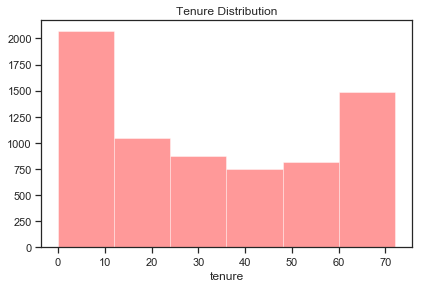

In [76]:
sns.distplot(df['tenure'],bins = 6, kde = False, color = 'red')
plt.tight_layout()
plt.title("Tenure Distribution")

Tenure values can divided into 6 categories of 12 months duration in each. From the graph, it is clear that no of customers are more in 2 categories: less than 12 months and greater than 60 months

In [77]:
def tenure(x) :
    if x["tenure"] <= 12:
        return "0-12"
    elif (x["tenure"] > 12) & (x["tenure"] <= 24 ):
        return "12-24"
    elif (x["tenure"] > 24) & (x["tenure"] <= 36) :
        return "24-36"
    elif (x["tenure"] > 36) & (x["tenure"] <= 48) :
        return "36-48"
    elif (x["tenure"] > 48) & (x["tenure"] <= 60) :
        return "48-60"
    elif x["tenure"] > 60 :
        return ">60"
    
df["tenure"] = df.apply(lambda x:tenure(x), axis = 1)

# 1.4 Visulalizing the data

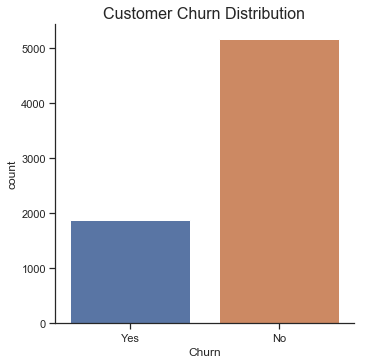

In [78]:
#Customer Churn Distribution using bar chart
sns.catplot(x="Churn", kind="count", data=df, order = ['Yes', 'No'])
plt.title('Customer Churn Distribution', fontsize=16)
plt.show()

In [79]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

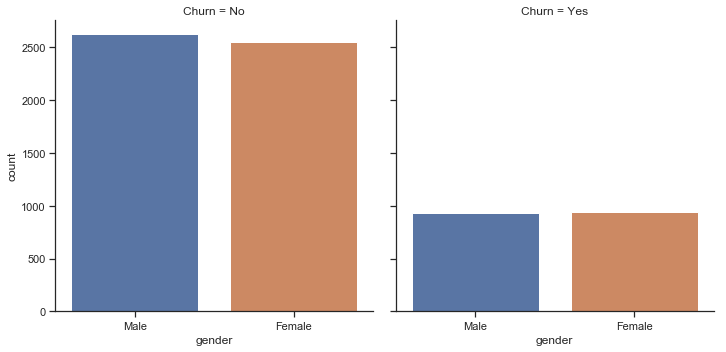

In [80]:
#Customer churn distribution across gender using bar chart
sns.catplot(x="gender", kind = "count", data = df, col = "Churn", order = ['Male', 'Female'])
plt.show()

Customer churn has happened irrespective of gender.

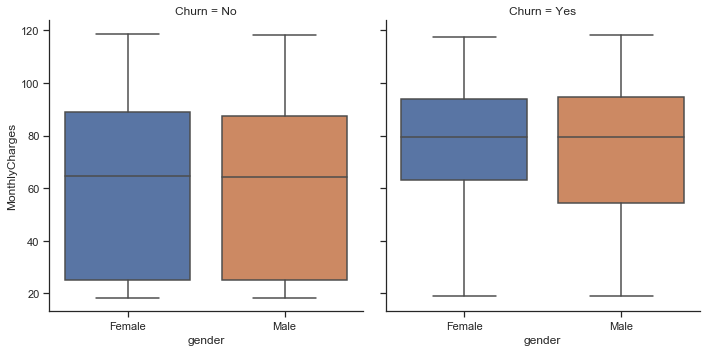

In [81]:
#Customer Churn across gender and monthly charges
sns.catplot(x="gender", y="MonthlyCharges", kind = "box", data = df, col = "Churn")
plt.show()

Customers with a likely average monthly charge of 80 are likely to churn

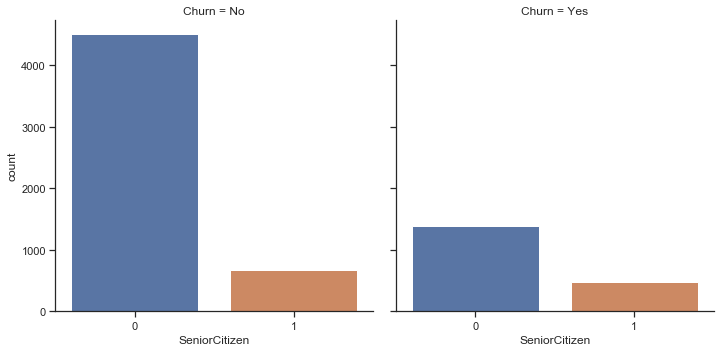

In [82]:
#Customer churn across Senior Citizen category
sns.catplot(x="SeniorCitizen", kind = "count", data = df, col = "Churn")
plt.show()

Not much churn has happened within the Senior Citizen category.

# 1.5 Data Preprocessing

In [83]:
#Converting Binary categorical variables 
binary = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in binary:
    df[i] = df[i].map(lambda x: 1 if x == "Yes" else 0)

In [84]:
#One-hot encoding the categorical variables
data = pd.get_dummies(df, columns=['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'])

#Drop the irrelevant variables to build the model
data = data.drop(["customerID", "gender_Female", "MultipleLines_No phone service", "InternetService_No", "Contract_Two year",
                 "PaymentMethod_Mailed check"], axis = 1)

In [85]:
#label Encoding 'tenure' variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['tenure'] = le.fit_transform(df['tenure'])
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,2,1,1,0,1,0,0,...,1,1,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,1,0,0,0,...,1,1,0,1,0,1,0,0,0,0
3,0,0,0,3,0,1,0,1,1,0,...,1,0,0,1,0,0,1,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


# 1.6 Correlation using Heatmap

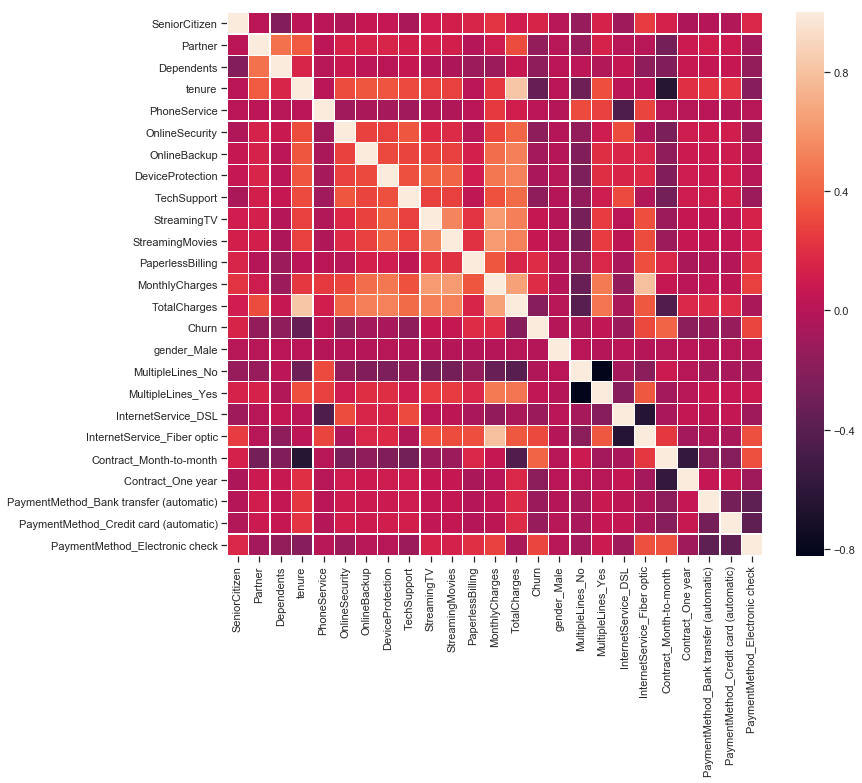

In [86]:
#Correlation across all features
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidths=.2)

# 2. Model Building

In [87]:
#Divide data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Churn', axis = 1), data['Churn'], 
                                                    test_size = 0.3, random_state = 123)

# 2.1 Logistic Regression

In [88]:
#Fit Logistic Regression on training data
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, Y_train)
prediction = logit.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score: ", accuracy_score(Y_test, prediction))
print("Precision score: ", precision_score(Y_test, prediction))
print("Recall score:", recall_score(Y_test, prediction))
print("F1 score:", f1_score(Y_test, prediction))

Accuracy score:  0.7931850449597728
Precision score:  0.6666666666666666
Recall score: 0.5186440677966102
F1 score: 0.5834127740705434


Since this is an imbalanced dataset and we are trying to predict the maximize the predicition of customers who are likely to churn, Recall score and F1 score have more importance than accuracy

In [90]:
#Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y_test, prediction)
confusion_df = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1370,153
Actual Churn,284,306


In [91]:
#Calculate Area under the ROC curve and also plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
probs = logit.predict_proba(X_test)[::,1]
auc = roc_auc_score(Y_test, probs)
print(auc)

0.8311060907886977


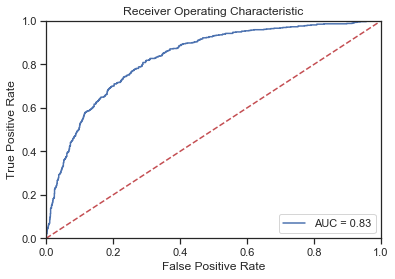

In [92]:
fpr, tpr, threshold = roc_curve(Y_test, probs)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

optimal_threshold

0.23514796183747527

In [94]:
#Updata model based on optimal probability threshold
new_prediction = np.where(probs>optimal_threshold, 1, 0)
new_confusion_mat = confusion_matrix(Y_test, new_prediction)
new_confusion_df = pd.DataFrame(new_confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
new_confusion_df

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1083,440
Actual Churn,114,476


In [95]:
print("Accuracy score: ", accuracy_score(Y_test, new_prediction))
print("Precision score: ", precision_score(Y_test, new_prediction))
print("Recall score:", recall_score(Y_test, new_prediction))
print("F1 score:", f1_score(Y_test, new_prediction))
print("ROC_AUC score:", roc_auc_score(Y_test, new_prediction))

Accuracy score:  0.7378135352579271
Precision score:  0.519650655021834
Recall score: 0.8067796610169492
F1 score: 0.6321381142098274
ROC_AUC score: 0.7589380905216068


Using the optimal threshold value, the recall score has increased to 0.80 from 0.51

# 2.2 Decision Tree Classifier

In [96]:
#Fit Decision Tree on training data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth':[3,4,5,6,None], 'max_features':[4,5,6,7,8]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 123), param_grid=param_grid, cv = 10)
gs.fit(X_train, Y_train)
prediction2 = gs.predict(X_test)
gs.best_params_

{'max_depth': 5, 'max_features': 5}

In [97]:
#Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, prediction2)
confusion_df2 = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df2

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1394,129
Actual Churn,351,239


In [98]:
#Calculate metrics
print("Accuracy score: ", accuracy_score(Y_test, prediction2))
print("Precision score: ", precision_score(Y_test, prediction2))
print("Recall score:", recall_score(Y_test, prediction2))
print("F1 score:", f1_score(Y_test, prediction2))
print("ROC_AUC score:", roc_auc_score(Y_test, prediction2))

Accuracy score:  0.7728348319924279
Precision score:  0.6494565217391305
Recall score: 0.40508474576271186
F1 score: 0.4989561586638831
ROC_AUC score: 0.6601917491124787


# 2.3 Bagging Classifier

In [99]:
from sklearn.ensemble import BaggingClassifier

bagged_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bagged_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [100]:
prediction3 = bagged_model.predict(X_test)

In [101]:
#Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, prediction3)
confusion_df3 = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df3

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1396,127
Actual Churn,315,275


In [102]:
#Calculate metrics
print("Accuracy score: ", accuracy_score(Y_test, prediction3))
print("Precision score: ", precision_score(Y_test, prediction3))
print("Recall score:", recall_score(Y_test, prediction3))
print("F1 score:", f1_score(Y_test, prediction3))
print("ROC_AUC score:", roc_auc_score(Y_test, prediction3))

Accuracy score:  0.7908187411263606
Precision score:  0.6840796019900498
Recall score: 0.4661016949152542
F1 score: 0.5544354838709677
ROC_AUC score: 0.6913568225068721


# 2.4 Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, n_jobs= -1)
rf_model.fit(X_train, Y_train)
prediction4 = rf_model.predict(X_test)

In [104]:
data1 = data.drop("Churn", axis = 1).columns

In [105]:
features_list = []
for name, score in zip(data1, rf_model.feature_importances_):
    features_list.append((score, name))
    
sorted(features_list, reverse=True)

[(0.21704674810627247, 'TotalCharges'),
 (0.19790168116641402, 'MonthlyCharges'),
 (0.07989720409965334, 'tenure'),
 (0.07258762052549651, 'Contract_Month-to-month'),
 (0.041033117710692665, 'InternetService_Fiber optic'),
 (0.03765880215002608, 'PaymentMethod_Electronic check'),
 (0.030309475036972625, 'gender_Male'),
 (0.029236106548644, 'PaperlessBilling'),
 (0.026942915458489276, 'OnlineSecurity'),
 (0.025651980106625484, 'Partner'),
 (0.02404206701934479, 'OnlineBackup'),
 (0.02280693217475212, 'SeniorCitizen'),
 (0.021991689690422825, 'DeviceProtection'),
 (0.021690336636103705, 'TechSupport'),
 (0.02126662022779336, 'Dependents'),
 (0.02047100926504276, 'StreamingTV'),
 (0.020360471088460525, 'StreamingMovies'),
 (0.015591921590320103, 'MultipleLines_No'),
 (0.015019500796078894, 'PaymentMethod_Bank transfer (automatic)'),
 (0.014805773169425857, 'PaymentMethod_Credit card (automatic)'),
 (0.013963427310512781, 'MultipleLines_Yes'),
 (0.012491084807341924, 'InternetService_DSL')

In [106]:
#Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, prediction4)
confusion_df4 = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df4

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1391,132
Actual Churn,316,274


In [107]:
#Calculate metrics
print("Accuracy score: ", accuracy_score(Y_test, prediction4))
print("Precision score: ", precision_score(Y_test, prediction4))
print("Recall score:", recall_score(Y_test, prediction4))
print("F1 score:", f1_score(Y_test, prediction4))
print("ROC_AUC score:", roc_auc_score(Y_test, prediction4))

Accuracy score:  0.7879791765262659
Precision score:  0.6748768472906403
Recall score: 0.46440677966101696
F1 score: 0.5502008032128514
ROC_AUC score: 0.6888678678344481


# 2.5 Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, n_estimators=250, learning_rate=0.01, random_state=123)
gb_model.fit(X_train, Y_train)
prediction5 = gb_model.predict(X_test)

In [109]:
feature_list = []
for name, score in zip(data1, gb_model.feature_importances_):
    feature_list.append((score, name))

sorted(features_list, reverse=True)

[(0.21704674810627247, 'TotalCharges'),
 (0.19790168116641402, 'MonthlyCharges'),
 (0.07989720409965334, 'tenure'),
 (0.07258762052549651, 'Contract_Month-to-month'),
 (0.041033117710692665, 'InternetService_Fiber optic'),
 (0.03765880215002608, 'PaymentMethod_Electronic check'),
 (0.030309475036972625, 'gender_Male'),
 (0.029236106548644, 'PaperlessBilling'),
 (0.026942915458489276, 'OnlineSecurity'),
 (0.025651980106625484, 'Partner'),
 (0.02404206701934479, 'OnlineBackup'),
 (0.02280693217475212, 'SeniorCitizen'),
 (0.021991689690422825, 'DeviceProtection'),
 (0.021690336636103705, 'TechSupport'),
 (0.02126662022779336, 'Dependents'),
 (0.02047100926504276, 'StreamingTV'),
 (0.020360471088460525, 'StreamingMovies'),
 (0.015591921590320103, 'MultipleLines_No'),
 (0.015019500796078894, 'PaymentMethod_Bank transfer (automatic)'),
 (0.014805773169425857, 'PaymentMethod_Credit card (automatic)'),
 (0.013963427310512781, 'MultipleLines_Yes'),
 (0.012491084807341924, 'InternetService_DSL')

In [110]:
#Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, prediction5)
confusion_df5 = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df5

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1436,87
Actual Churn,388,202


In [111]:
#Calculate metrics
print("Accuracy score: ", accuracy_score(Y_test, prediction5))
print("Precision score: ", precision_score(Y_test, prediction5))
print("Recall score:", recall_score(Y_test, prediction5))
print("F1 score:", f1_score(Y_test, prediction5))
print("ROC_AUC score:", roc_auc_score(Y_test, prediction5))

Accuracy score:  0.77520113582584
Precision score:  0.698961937716263
Recall score: 0.3423728813559322
F1 score: 0.45961319681456203
ROC_AUC score: 0.6426243920896535


# 2.6 Ada Boost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=200, learning_rate=0.01, random_state=123)
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=123)

In [113]:
prediction6 = ada_model.predict(X_test)

In [114]:
feature_list = []
for name, score in zip(data1, ada_model.feature_importances_):
    feature_list.append((score, name))

sorted(features_list, reverse=True)

[(0.21704674810627247, 'TotalCharges'),
 (0.19790168116641402, 'MonthlyCharges'),
 (0.07989720409965334, 'tenure'),
 (0.07258762052549651, 'Contract_Month-to-month'),
 (0.041033117710692665, 'InternetService_Fiber optic'),
 (0.03765880215002608, 'PaymentMethod_Electronic check'),
 (0.030309475036972625, 'gender_Male'),
 (0.029236106548644, 'PaperlessBilling'),
 (0.026942915458489276, 'OnlineSecurity'),
 (0.025651980106625484, 'Partner'),
 (0.02404206701934479, 'OnlineBackup'),
 (0.02280693217475212, 'SeniorCitizen'),
 (0.021991689690422825, 'DeviceProtection'),
 (0.021690336636103705, 'TechSupport'),
 (0.02126662022779336, 'Dependents'),
 (0.02047100926504276, 'StreamingTV'),
 (0.020360471088460525, 'StreamingMovies'),
 (0.015591921590320103, 'MultipleLines_No'),
 (0.015019500796078894, 'PaymentMethod_Bank transfer (automatic)'),
 (0.014805773169425857, 'PaymentMethod_Credit card (automatic)'),
 (0.013963427310512781, 'MultipleLines_Yes'),
 (0.012491084807341924, 'InternetService_DSL')

In [115]:
#Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test, prediction6)
confusion_df6 = pd.DataFrame(confusion_mat, index = ['Actual Not Churn', 'Actual Churn'], 
                            columns = ['Predicted Not Churn','Predicted Churn'])
confusion_df6

,Predicted Not Churn,Predicted Churn
Actual Not Churn,1365,158
Actual Churn,310,280


In [116]:
#Calculate confusion matrix
print("Accuracy score: ", accuracy_score(Y_test, prediction6))
print("Precision score: ", precision_score(Y_test, prediction6))
print("Recall score:", recall_score(Y_test, prediction6))
print("F1 score:", f1_score(Y_test, prediction6))
print("ROC_AUC score:", roc_auc_score(Y_test, prediction6))

Accuracy score:  0.7785139611926172
Precision score:  0.639269406392694
Recall score: 0.4745762711864407
F1 score: 0.5447470817120622
ROC_AUC score: 0.6854168289615723


# 3. Compare Model metrics

In [117]:
#Model report 
def model_report(model,train_x,test_x,train_y,test_y,name) :
    model.fit(train_x,train_y)
    predictions  = model.predict(test_x)
    accuracy     = accuracy_score(test_y,predictions)
    precision    = precision_score(test_y,predictions)
    recall       = recall_score(test_y,predictions)
    f1score      = f1_score(test_y,predictions) 
    roc_auc      = roc_auc_score(test_y,predictions)
    
        
    a = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Precision"       : [precision],
                       "Recall"          : [recall],
                       "F1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],                    
                      })
    return a

#outputs for every model
model1 = model_report(gs,X_train,X_test,Y_train,Y_test,"Decision Tree using GridSearch")                    
model2 = model_report(bagged_model,X_train,X_test,Y_train,Y_test, "Bagging Classifier")
model3 = model_report(rf_model,X_train,X_test,Y_train,Y_test, "Random Forest")
model4 = model_report(gb_model,X_train,X_test,Y_train,Y_test, "Gradient Boost Ensemble")
model5 = model_report(ada_model,X_train,X_test,Y_train,Y_test, "Ada Boost Ensemble")

#Compare model
model_compare = pd.concat([model1,model2, model3, model4, model5],axis = 0).reset_index()
model_compare = model_compare.drop(columns = "index",axis =1)

model_compare.append({"Model":"Logistic Regression", "Accuracy_score":0.737813, "Precision":0.519650, "Recall":0.806779, 
              "F1_score":0.632138, "Area_under_curve":0.758938}, ignore_index = True)

,Model,Accuracy_score,Precision,Recall,F1_score,Area_under_curve
0,Decision Tree using GridSearch,0.772835,0.649457,0.405085,0.498956,0.660192
1,Bagging Classifier,0.790819,0.696809,0.444068,0.542443,0.684608
2,Random Forest,0.785613,0.666667,0.464407,0.547453,0.687226
3,Gradient Boost Ensemble,0.775201,0.698962,0.342373,0.459613,0.642624
4,Ada Boost Ensemble,0.778514,0.639269,0.474576,0.544747,0.685417
5,Logistic Regression,0.737813,0.519650,0.806779,0.632138,0.758938


# It is clear that Logistics Regression performs well with high Recall score of 0.80 and F1 score of 0.63 compared to the other models.The AUC score is also the highest under Logistic Regression